ÏÇ¨Ïö© ÎîîÎ∞îÏù¥Ïä§: cuda
Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎî© Ï§ë...
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖã: 8000Í∞ú
Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî Ï†ÅÏö©Îê®
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã: 2000Í∞ú
Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî Ï†ÅÏö©Îê®
ÏµúÏ†ÅÌôîÎêú Î™®Îç∏ ÏÉùÏÑ± - ÌååÎùºÎØ∏ÌÑ∞ Ïàò: 170,890
ÏµúÏ†ÅÌôîÎêú ÌõàÎ†® ÏãúÏûë - Epochs: 120, LR: 0.003, Device: cuda
Epoch  Train Loss   Test Loss    Best Test    LR        
------------------------------------------------------------
0      0.888895     0.483616     0.483616     0.003000  
10     0.397776     0.298337     0.297076     0.003000  
20     0.353807     0.254632     0.254632     0.003000  
30     0.330798     0.243035     0.232971     0.003000  
40     0.317205     0.232080     0.226832     0.003000  
50     0.307795     0.219435     0.213004     0.003000  
60     0.294344     0.213172     0.204700     0.003000  
70     0.288271     0.206378     0.204181     0.003000  
80     0.281195     0.196943     0.196943     0.003000  
90     0.278860     0.204012     0.195896     0.003000  
100    0.277568  

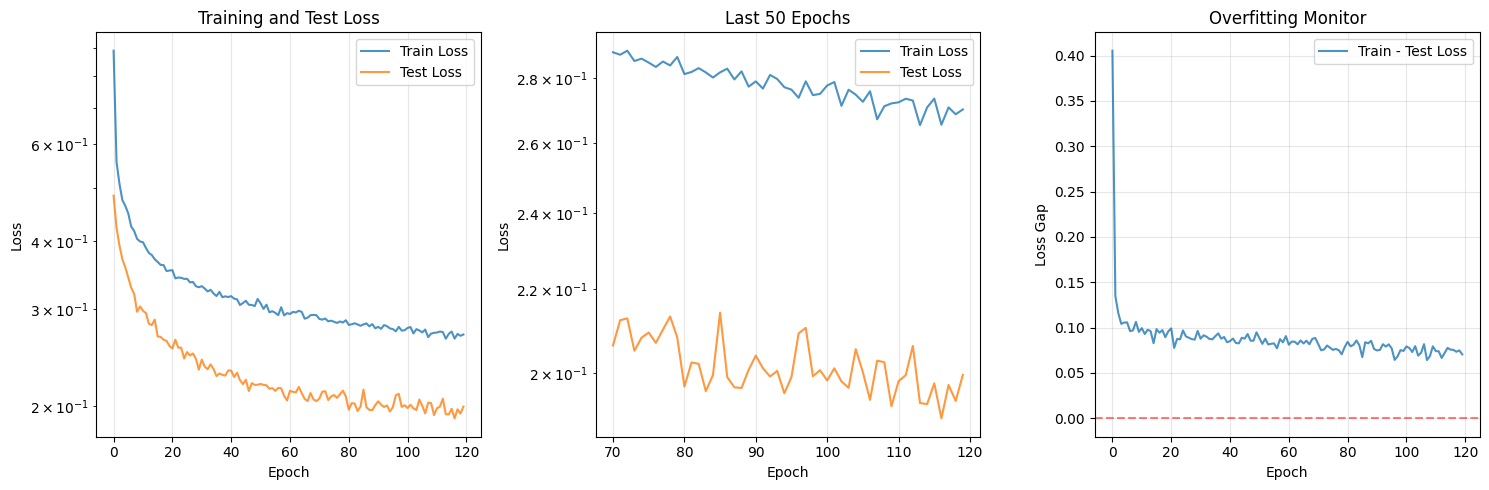


=== ÏµúÏ†ÅÌôîÎêú Î™®Îç∏ ÌÖåÏä§Ìä∏ Í≤∞Í≥º ===

ÌÖåÏä§Ìä∏ 1:
Î∞©Ï†ïÏãù: 96.240x^5 + -85.064x^4 + -35.283x^3 + -2.883x^2 + 87.959x + -26.818 = 0
Í∑ºÎ≥Ñ ÎπÑÍµê:
  Í∑º 1:
    Ïã§Ï†ú: 0.000000 + 0.330089i (ÌÅ¨Í∏∞: 0.330089)
    ÏòàÏ∏°: 0.023639 + 0.154563i (ÌÅ¨Í∏∞: 0.156360)
    ÌÅ¨Í∏∞ Ïò§Ï∞®: 0.173729
  Í∑º 2:
    Ïã§Ï†ú: -0.639122 + -0.647935i (ÌÅ¨Í∏∞: 0.910108)
    ÏòàÏ∏°: -0.717063 + -0.545858i (ÌÅ¨Í∏∞: 0.901188)
    ÌÅ¨Í∏∞ Ïò§Ï∞®: 0.008920
  Í∑º 3:
    Ïã§Ï†ú: 0.639122 + -0.647935i (ÌÅ¨Í∏∞: 0.910108)
    ÏòàÏ∏°: 0.684019 + -0.576518i (ÌÅ¨Í∏∞: 0.894570)
    ÌÅ¨Í∏∞ Ïò§Ï∞®: 0.015538
  Í∑º 4:
    Ïã§Ï†ú: -0.404847 + 0.924824i (ÌÅ¨Í∏∞: 1.009555)
    ÏòàÏ∏°: -0.468945 + 0.981411i (ÌÅ¨Í∏∞: 1.087694)
    ÌÅ¨Í∏∞ Ïò§Ï∞®: 0.078138
  Í∑º 5:
    Ïã§Ï†ú: 0.404847 + 0.924824i (ÌÅ¨Í∏∞: 1.009555)
    ÏòàÏ∏°: 0.422007 + 0.738433i (ÌÅ¨Í∏∞: 0.850513)
    ÌÅ¨Í∏∞ Ïò§Ï∞®: 0.159042
MSE Ïò§Ï∞®: 0.009733
ÌèâÍ∑† ÌÅ¨Í∏∞ Ïò§Ï∞®: 0.087074

ÌÖåÏä§Ìä∏ 2:
Î∞©Ï†ïÏãù: 40.370x^5 + -47.924x^4 + -90.643x^3 + 83.653x^2 + -9

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

class PolynomialDataset(Dataset):
    def __init__(self, data_file, train=True, train_ratio=0.8, normalize=True):
        """
        Ï†ÄÏû•Îêú Îç∞Ïù¥ÌÑ∞ ÌååÏùºÎ°úÎ∂ÄÌÑ∞ Dataset ÏÉùÏÑ±
        
        Args:
            data_file: Îç∞Ïù¥ÌÑ∞ ÌååÏùº Í≤ΩÎ°ú (.json ÎòêÎäî .pkl)
            train: TrueÎ©¥ ÌõàÎ†®Ïö©, FalseÎ©¥ ÌÖåÏä§Ìä∏Ïö©
            train_ratio: ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï† ÎπÑÏú®
            normalize: Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî Ïó¨Î∂Ä
        """
        self.data = self.load_data(data_file)
        self.normalize = normalize
        self.coeffs, self.roots = self.prepare_data()
        
        # Ï†ïÍ∑úÌôî ÌååÎùºÎØ∏ÌÑ∞ Ï†ÄÏû•
        if normalize:
            self.coeff_mean = np.mean(self.coeffs, axis=0)
            self.coeff_std = np.std(self.coeffs, axis=0) + 1e-8
            self.root_mean = np.mean(self.roots, axis=0)
            self.root_std = np.std(self.roots, axis=0) + 1e-8
            
            # Ï†ïÍ∑úÌôî Ï†ÅÏö©
            self.coeffs = (self.coeffs - self.coeff_mean) / self.coeff_std
            self.roots = (self.roots - self.root_mean) / self.root_std
        
        # ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
        train_coeffs, test_coeffs, train_roots, test_roots = train_test_split(
            self.coeffs, self.roots, train_size=train_ratio, random_state=42
        )
        
        if train:
            self.coeffs = train_coeffs
            self.roots = train_roots
        else:
            self.coeffs = test_coeffs
            self.roots = test_roots
        
        print(f"{'ÌõàÎ†®' if train else 'ÌÖåÏä§Ìä∏'} Îç∞Ïù¥ÌÑ∞ÏÖã: {len(self.coeffs)}Í∞ú")
        if normalize:
            print(f"Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî Ï†ÅÏö©Îê®")
    
    def load_data(self, filename):
        """Îç∞Ïù¥ÌÑ∞ ÌååÏùº Î°úÎìú"""
        if filename.endswith('.json'):
            with open(filename, 'r', encoding='utf-8') as f:
                return json.load(f)
        elif filename.endswith('.pkl'):
            with open(filename, 'rb') as f:
                return pickle.load(f)
        else:
            raise ValueError("ÏßÄÏõêÌïòÏßÄ ÏïäÎäî ÌååÏùº ÌòïÏãùÏûÖÎãàÎã§. (.json ÎòêÎäî .pkl ÏÇ¨Ïö©)")
    
    def prepare_data(self):
        """Îç∞Ïù¥ÌÑ∞Î•º ÌïôÏäµÏö© ÌòïÌÉúÎ°ú Î≥ÄÌôò"""
        coeffs = []
        roots = []
        
        for item in self.data:
            coeffs.append(item['coefficients'])
            
            # Í∑º Îç∞Ïù¥ÌÑ∞ ÌòïÏãù ÌôïÏù∏ Î∞è Î≥ÄÌôò
            item_roots = item['roots']
            
            if isinstance(item_roots[0], list):
                # [[Ïã§ÏàòÎ∂Ä, ÌóàÏàòÎ∂Ä], ...] ÌòïÌÉúÎ•º [Ïã§ÏàòÎ∂Ä1, ÌóàÏàòÎ∂Ä1, ...] ÌòïÌÉúÎ°ú ÌèâÌÉÑÌôî
                flattened_roots = []
                for root in item_roots:
                    flattened_roots.extend(root)
                roots.append(flattened_roots)
            else:
                # Ïù¥ÎØ∏ [Ïã§ÏàòÎ∂Ä1, ÌóàÏàòÎ∂Ä1, ...] ÌòïÌÉú
                roots.append(item_roots)
        
        return np.array(coeffs, dtype=np.float32), np.array(roots, dtype=np.float32)
    
    def denormalize_roots(self, normalized_roots):
        """Í∑ºÏùÑ ÏõêÎûò Ïä§ÏºÄÏùºÎ°ú ÎêòÎèåÎ¶¨Í∏∞"""
        if self.normalize and hasattr(self, 'root_mean'):
            return normalized_roots * self.root_std + self.root_mean
        return normalized_roots
    
    def __len__(self):
        return len(self.coeffs)
    
    def __getitem__(self, idx):
        return torch.FloatTensor(self.coeffs[idx]), torch.FloatTensor(self.roots[idx])

class OptimizedPolynomialRootNet(nn.Module):
    """Í≤ΩÎüâÌôîÎêú Ìö®Ïú®Ï†ÅÏù∏ Îã§Ìï≠Ïãù Í∑º Ï∞æÍ∏∞ ÎÑ§Ìä∏ÏõåÌÅ¨"""
    def __init__(self, input_size=6, output_size=10, hidden_size=512, num_layers=4, dropout=0.3):
        super(OptimizedPolynomialRootNet, self).__init__()
        
        layers = []
        current_size = input_size
        
        # Ï≤´ Î≤àÏß∏ Ï∏µ
        layers.extend([
            nn.Linear(current_size, hidden_size),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_size),
            nn.Dropout(dropout)
        ])
        current_size = hidden_size
        
        # Ï§ëÍ∞Ñ Ï∏µÎì§ (Ï†êÏßÑÏ†Å ÌÅ¨Í∏∞ Í∞êÏÜå)
        for i in range(num_layers - 2):
            next_size = hidden_size // (2 ** (i + 1))
            next_size = max(next_size, 64)  # ÏµúÏÜå 64Í∞ú Îâ¥Îü∞
            
            layers.extend([
                nn.Linear(current_size, next_size),
                nn.ReLU(),
                nn.BatchNorm1d(next_size),
                nn.Dropout(dropout * 0.8)  # Ï†êÏßÑÏ†ÅÏúºÎ°ú ÎìúÎ°≠ÏïÑÏõÉ Í∞êÏÜå
            ])
            current_size = next_size
        
        # Ï∂úÎ†•Ï∏µ
        layers.append(nn.Linear(current_size, output_size))
        
        self.network = nn.Sequential(*layers)
        
        # Í∞ÄÏ§ëÏπò Ï¥àÍ∏∞Ìôî
        self.apply(self._init_weights)
    
    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            nn.init.xavier_uniform_(module.weight)
            nn.init.constant_(module.bias, 0)
    
    def forward(self, x):
        return self.network(x)

class OptimizedPolynomialTrainer:
    def __init__(self, model, train_loader, test_loader, device='cpu'):
        self.model = model.to(device)
        self.train_loader = train_loader
        self.test_loader = test_loader
        self.device = device
        
        # ÌõàÎ†® Í∏∞Î°ù
        self.train_losses = []
        self.test_losses = []
        self.best_test_loss = float('inf')
        self.best_model_state = None
    
    def complex_aware_loss(self, pred_roots, true_roots, alpha=0.3):
        """
        Î≥µÏÜåÏàò Í∑ºÏùÑ Í≥†Î†§Ìïú ÏÜêÏã§ Ìï®Ïàò (Í∞ÑÎã®Ìïú Î≤ÑÏ†Ñ)
        """
        # Í∏∞Î≥∏ MSE ÏÜêÏã§
        mse_loss = nn.MSELoss()(pred_roots, true_roots)
        
        # Ïã§ÏàòÎ∂ÄÏôÄ ÌóàÏàòÎ∂Ä Î∂ÑÎ¶¨
        pred_real = pred_roots[:, 0::2]  # Ïã§ÏàòÎ∂Ä
        pred_imag = pred_roots[:, 1::2]  # ÌóàÏàòÎ∂Ä
        true_real = true_roots[:, 0::2]
        true_imag = true_roots[:, 1::2]
        
        # ÌÅ¨Í∏∞(Ï†àÎåìÍ∞í) ÏÜêÏã§
        pred_magnitude = torch.sqrt(pred_real**2 + pred_imag**2)
        true_magnitude = torch.sqrt(true_real**2 + true_imag**2)
        magnitude_loss = nn.MSELoss()(pred_magnitude, true_magnitude)
        
        return (1 - alpha) * mse_loss + alpha * magnitude_loss
    
    def train_epoch(self, optimizer, criterion, use_complex_loss=True):
        self.model.train()
        total_loss = 0
        num_batches = 0
        
        for coeffs, roots in self.train_loader:
            coeffs, roots = coeffs.to(self.device), roots.to(self.device)
            
            optimizer.zero_grad()
            
            # ÏàúÏ†ÑÌåå
            pred_roots = self.model(coeffs)
            
            # ÏÜêÏã§ Í≥ÑÏÇ∞
            if use_complex_loss:
                loss = self.complex_aware_loss(pred_roots, roots)
            else:
                loss = criterion(pred_roots, roots)
            
            # Ïó≠Ï†ÑÌåå
            loss.backward()
            
            # Í∑∏ÎûòÎîîÏñ∏Ìä∏ ÌÅ¥Î¶¨Ìïë
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
            
            optimizer.step()
            
            total_loss += loss.item()
            num_batches += 1
        
        return total_loss / num_batches
    
    def test_epoch(self, criterion, use_complex_loss=True):
        self.model.eval()
        total_loss = 0
        num_batches = 0
        
        with torch.no_grad():
            for coeffs, roots in self.test_loader:
                coeffs, roots = coeffs.to(self.device), roots.to(self.device)
                
                pred_roots = self.model(coeffs)
                
                if use_complex_loss:
                    loss = self.complex_aware_loss(pred_roots, roots)
                else:
                    loss = criterion(pred_roots, roots)
                
                total_loss += loss.item()
                num_batches += 1
        
        return total_loss / num_batches
    
    def train(self, epochs=100, lr=0.001, use_scheduler=True, use_complex_loss=True, save_best=True):
        """ÏµúÏ†ÅÌôîÎêú ÌõàÎ†® ÏÑ§Ï†ï"""
        print(f"ÏµúÏ†ÅÌôîÎêú ÌõàÎ†® ÏãúÏûë - Epochs: {epochs}, LR: {lr}, Device: {self.device}")
        
        # ÏòµÌã∞ÎßàÏù¥Ï†Ä (AdamW with weight decay)
        optimizer = optim.AdamW(self.model.parameters(), lr=lr, weight_decay=1e-4)
        criterion = nn.MSELoss()
        
        # ÌïôÏäµÎ•† Ïä§ÏºÄÏ§ÑÎü¨
        if use_scheduler:
            scheduler = optim.lr_scheduler.ReduceLROnPlateau(
                optimizer, mode='min', factor=0.5, patience=15
            )
        
        print(f"{'Epoch':<6} {'Train Loss':<12} {'Test Loss':<12} {'Best Test':<12} {'LR':<10}")
        print("-" * 60)
        
        for epoch in range(epochs):
            # ÌõàÎ†®
            train_loss = self.train_epoch(optimizer, criterion, use_complex_loss)
            self.train_losses.append(train_loss)
            
            # ÌÖåÏä§Ìä∏
            test_loss = self.test_epoch(criterion, use_complex_loss)
            self.test_losses.append(test_loss)
            
            # Ïä§ÏºÄÏ§ÑÎü¨ ÏóÖÎç∞Ïù¥Ìä∏
            if use_scheduler:
                old_lr = optimizer.param_groups[0]['lr']
                scheduler.step(test_loss)
                new_lr = optimizer.param_groups[0]['lr']
                if old_lr != new_lr:
                    print(f"ÌïôÏäµÎ•† Í∞êÏÜå: {old_lr:.6f} -> {new_lr:.6f}")
            
            # ÏµúÍ≥† Î™®Îç∏ Ï†ÄÏû•
            if save_best and test_loss < self.best_test_loss:
                self.best_test_loss = test_loss
                self.best_model_state = self.model.state_dict().copy()
            
            # ÏßÑÌñâ ÏÉÅÌô© Ï∂úÎ†•
            if epoch % 10 == 0 or epoch == epochs - 1:
                current_lr = optimizer.param_groups[0]['lr']
                print(f"{epoch:<6} {train_loss:<12.6f} {test_loss:<12.6f} {self.best_test_loss:<12.6f} {current_lr:<10.6f}")
        
        # ÏµúÍ≥† Î™®Îç∏ Î°úÎìú
        if save_best and self.best_model_state:
            self.model.load_state_dict(self.best_model_state)
            print(f"\nÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ Î°úÎìú ÏôÑÎ£å (Test Loss: {self.best_test_loss:.6f})")
    
    def plot_training_curve(self):
        """ÌõàÎ†® Í≥°ÏÑ† ÏãúÍ∞ÅÌôî"""
        plt.figure(figsize=(15, 5))
        
        # ÏÜêÏã§ Í≥°ÏÑ†
        plt.subplot(1, 3, 1)
        plt.plot(self.train_losses, label='Train Loss', alpha=0.8)
        plt.plot(self.test_losses, label='Test Loss', alpha=0.8)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training and Test Loss')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.yscale('log')
        
        # ÏµúÍ∑º 50 ÏóêÌè¨ÌÅ¨
        plt.subplot(1, 3, 2)
        start_idx = max(0, len(self.train_losses) - 50)
        plt.plot(range(start_idx, len(self.train_losses)), 
                self.train_losses[start_idx:], label='Train Loss', alpha=0.8)
        plt.plot(range(start_idx, len(self.test_losses)), 
                self.test_losses[start_idx:], label='Test Loss', alpha=0.8)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Last 50 Epochs')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.yscale('log')
        
        # ÏÜêÏã§ Ï∞®Ïù¥ (Ïò§Î≤ÑÌîºÌåÖ Î™®ÎãàÌÑ∞ÎßÅ)
        plt.subplot(1, 3, 3)
        gap = np.array(self.train_losses) - np.array(self.test_losses)
        plt.plot(gap, label='Train - Test Loss', alpha=0.8)
        plt.xlabel('Epoch')
        plt.ylabel('Loss Gap')
        plt.title('Overfitting Monitor')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
        
        plt.tight_layout()
        plt.show()
    
    def save_model(self, filepath_base, save_formats=['pth']):
        """Î™®Îç∏ Ï†ÄÏû• (Í∞ÑÎã®Ìïú Î≤ÑÏ†Ñ)"""
        model_data = {
            'model_state_dict': self.model.state_dict(),
            'model_architecture': {
                'input_size': 6,
                'output_size': 10,
                'hidden_size': 512,
                'num_layers': 4,
                'dropout': 0.3
            },
            'train_losses': self.train_losses,
            'test_losses': self.test_losses,
            'best_test_loss': self.best_test_loss,
            'model_class': 'OptimizedPolynomialRootNet'
        }
        
        for fmt in save_formats:
            if fmt == 'pth':
                filepath = f"{filepath_base}.pth"
                torch.save(model_data, filepath)
                print(f"Î™®Îç∏ Ï†ÄÏû•: {filepath}")

def test_model_optimized(model, test_loader, test_dataset, device, num_examples=5):
    """ÏµúÏ†ÅÌôîÎêú Î™®Îç∏ ÌÖåÏä§Ìä∏"""
    model.eval()
    
    print("\n=== ÏµúÏ†ÅÌôîÎêú Î™®Îç∏ ÌÖåÏä§Ìä∏ Í≤∞Í≥º ===")
    
    total_mse = 0
    total_magnitude_error = 0
    num_samples = 0
    
    with torch.no_grad():
        for i, (coeffs, true_roots) in enumerate(test_loader):
            if i >= num_examples:
                break
            
            coeffs, true_roots = coeffs.to(device), true_roots.to(device)
            pred_roots = model(coeffs)
            
            # Ï≤´ Î≤àÏß∏ ÏÉòÌîåÎßå Ï∂úÎ†•
            if coeffs.shape[0] > 0:
                # Ï†ïÍ∑úÌôîÎêú Îç∞Ïù¥ÌÑ∞Î•º ÏõêÎûò Ïä§ÏºÄÏùºÎ°ú Î≥µÏõê
                if hasattr(test_dataset, 'denormalize_roots'):
                    true_vals = test_dataset.denormalize_roots(true_roots[0].cpu().numpy())
                    pred_vals = test_dataset.denormalize_roots(pred_roots[0].cpu().numpy())
                else:
                    true_vals = true_roots[0].cpu().numpy()
                    pred_vals = pred_roots[0].cpu().numpy()
                
                # Í≥ÑÏàòÎèÑ Î≥µÏõê
                if hasattr(test_dataset, 'coeff_mean'):
                    coeff_vals = coeffs[0].cpu().numpy() * test_dataset.coeff_std + test_dataset.coeff_mean
                else:
                    coeff_vals = coeffs[0].cpu().numpy()
                
                print(f"\nÌÖåÏä§Ìä∏ {i+1}:")
                print(f"Î∞©Ï†ïÏãù: {coeff_vals[0]:.3f}x^5 + {coeff_vals[1]:.3f}x^4 + {coeff_vals[2]:.3f}x^3 + {coeff_vals[3]:.3f}x^2 + {coeff_vals[4]:.3f}x + {coeff_vals[5]:.3f} = 0")
                
                # Í∑ºÎ≥Ñ ÎπÑÍµê
                print("Í∑ºÎ≥Ñ ÎπÑÍµê:")
                magnitude_errors = []
                for j in range(5):
                    true_real, true_imag = true_vals[j*2], true_vals[j*2 + 1]
                    pred_real, pred_imag = pred_vals[j*2], pred_vals[j*2 + 1]
                    
                    true_mag = np.sqrt(true_real**2 + true_imag**2)
                    pred_mag = np.sqrt(pred_real**2 + pred_imag**2)
                    mag_error = abs(true_mag - pred_mag)
                    magnitude_errors.append(mag_error)
                    
                    print(f"  Í∑º {j+1}:")
                    if abs(true_imag) < 1e-6:
                        print(f"    Ïã§Ï†ú: {true_real:.6f}")
                    else:
                        print(f"    Ïã§Ï†ú: {true_real:.6f} + {true_imag:.6f}i (ÌÅ¨Í∏∞: {true_mag:.6f})")
                    
                    if abs(pred_imag) < 1e-6:
                        print(f"    ÏòàÏ∏°: {pred_real:.6f}")
                    else:
                        print(f"    ÏòàÏ∏°: {pred_real:.6f} + {pred_imag:.6f}i (ÌÅ¨Í∏∞: {pred_mag:.6f})")
                    
                    print(f"    ÌÅ¨Í∏∞ Ïò§Ï∞®: {mag_error:.6f}")
                
                # Ï†ÑÏ≤¥ Ïò§Ï∞®
                mse_error = np.mean((true_vals - pred_vals)**2)
                avg_mag_error = np.mean(magnitude_errors)
                
                print(f"MSE Ïò§Ï∞®: {mse_error:.6f}")
                print(f"ÌèâÍ∑† ÌÅ¨Í∏∞ Ïò§Ï∞®: {avg_mag_error:.6f}")
                
                total_mse += mse_error
                total_magnitude_error += avg_mag_error
                num_samples += 1
    
    print(f"\n=== Ï†ÑÏ≤¥ ÌÖåÏä§Ìä∏ ÌÜµÍ≥Ñ ===")
    print(f"ÌèâÍ∑† MSE Ïò§Ï∞®: {total_mse/num_samples:.6f}")
    print(f"ÌèâÍ∑† ÌÅ¨Í∏∞ Ïò§Ï∞®: {total_magnitude_error/num_samples:.6f}")

def main():
    # ÏµúÏ†ÅÌôîÎêú ÏÑ§Ï†ï
    data_file = "polynomial_dataset_sorted.json"
    batch_size = 64  # Î∞∞Ïπò ÌÅ¨Í∏∞ Ï¶ùÍ∞Ä
    epochs = 120     # Ï†ÅÏ†àÌïú ÏóêÌè¨ÌÅ¨ Ïàò
    learning_rate = 0.003  # Ï†ÅÏ†àÌïú ÌïôÏäµÎ•†
    
    # GPU ÏÇ¨Ïö©
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"ÏÇ¨Ïö© ÎîîÎ∞îÏù¥Ïä§: {device}")
    
    if not os.path.exists(data_file):
        print(f"Îç∞Ïù¥ÌÑ∞ ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§: {data_file}")
        return
    
    # Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎî©
    print("Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎî© Ï§ë...")
    train_dataset = PolynomialDataset(data_file, train=True, normalize=True)
    test_dataset = PolynomialDataset(data_file, train=False, normalize=True)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
    
    # ÏµúÏ†ÅÌôîÎêú Í≤ΩÎüâ Î™®Îç∏
    model = OptimizedPolynomialRootNet(
        hidden_size=512,   # 1024 -> 512Î°ú Í∞êÏÜå
        num_layers=4,      # 8 -> 4Î°ú Í∞êÏÜå
        dropout=0.3        # Ï†ÅÏ†àÌïú ÎìúÎ°≠ÏïÑÏõÉ
    )
    
    param_count = sum(p.numel() for p in model.parameters())
    print(f"ÏµúÏ†ÅÌôîÎêú Î™®Îç∏ ÏÉùÏÑ± - ÌååÎùºÎØ∏ÌÑ∞ Ïàò: {param_count:,}")
    
    # ÏµúÏ†ÅÌôîÎêú Ìä∏Î†àÏù¥ÎÑà
    trainer = OptimizedPolynomialTrainer(model, train_loader, test_loader, device)
    
    # ÌõàÎ†® Ïã§Ìñâ
    trainer.train(
        epochs=epochs, 
        lr=learning_rate, 
        use_scheduler=True,
        use_complex_loss=True
    )
    
    # Í≤∞Í≥º ÏãúÍ∞ÅÌôî
    trainer.plot_training_curve()
    
    # Î™®Îç∏ ÌÖåÏä§Ìä∏
    test_model_optimized(trainer.model, test_loader, test_dataset, device)
    
    # Î™®Îç∏ Ï†ÄÏû•
    trainer.save_model("optimized_polynomial_model")
    
    print("\nÏµúÏ†ÅÌôîÎêú ÌõàÎ†® ÏôÑÎ£å! üéØ")

if __name__ == "__main__":
    main()